## Name : Vaishali
## Student Number : 200417634
## ***Email ID : vaishali61295@gmail.com***

## Part A - Determine a Proper Model

Using the sci-kit learn algorithm in the flow-chart given to us in the assignment question, I have inferred a few machine learning algorithms that can work with the data set I have selected. There are some techniques determined which can work well with the type of data set 'Google job skills' that we have picked. The data set has more than 50 samples with proper categories and labeled data. It also has less than a hundred thousand representations, so we have to choose from any classification algorithms. That narrowed our search to select Linear SVC, Naive Bayes, or KNeighbours classifier algorithms.



 So, I got started with SVM (Support Vector Machines) as it seems like it is suitable to use it for our current data set. 
It is the Support Vector Machines algorithm used here as it makes fast predictions as compared to the Naive Bayes algorithm. That also operates as a discriminative classifier, which is the hyperplane. It has an enormous margin space that divides the data sets into classes quite easily. It also offers good accuracy of test data. It converts low dimensional data to high for a better fit to train the model. That is how it converts non-linear problems into separable form. 

It works with a kernel technique which optimally finds the hyperplane with divides the datasets into the best possible way. It increases the dimensional space of the dataset for classifying different categories and classes. The objective of SVM is to determine the maximum marginal hyperplane(MMH). That is to properly fit the data set for more useful training of it. That gives accurate test outcomes while the prediction of test data. It uses the support vectors, which are the data points closer to the hyperplane, which helps in appropriately measuring of margin space. That is how SVM (Support Vector Machines) algorithm functions.



---



## Part B - Apply the Algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import re
import csv

### Loading Data

We will first upload the dataset.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving job_skills.csv to job_skills.csv


In [ ]:
import io
skills = pd.read_csv(io.BytesIO(uploaded['job_skills.csv']))

In [ ]:
skills.head(100)


Here we will be encoding the categories of our data set to object. And then make a list of all them.

In [ ]:
encode_categories = skills.dtypes==object

In [ ]:
list_categories = skills.columns[encode_categories].tolist()

In [ ]:
skills.shape

(1250, 7)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
skills['Responsibilities'] =skills['Responsibilities'].astype("str")

In [ ]:
skills['Minimum Qualifications'] =skills['Minimum Qualifications'].astype("str")

In [ ]:
skills['Preferred Qualifications'] =skills['Preferred Qualifications'].astype("str")

In [ ]:
skills[list_categories] = skills[list_categories].apply(lambda col: le.fit_transform(col))

In [ ]:
skills.head(2)

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,0,298,14,72,684,295,310
1,0,700,8,71,300,642,109


Now we converted our data set which was in string format to numeric form by applying the fit transform function. To fit the selected model, Responsibilities, Minimum Qualifications, and Preferred Qualifications are transformed into numeric categories for better working on the data set.

In [ ]:
#import the necessary modules
from sklearn.svm import SVC

We train the 'Company' column as we are making predictions by given the Title, Category, Location, Responsibilities, Minimum Qualifications, and Preferred Qualifications in which company a person will work. So Google and YouTube are the two options our test data set is predicting. And that is our target set.

In [ ]:
X = skills.drop(columns = ["Company"])

In [ ]:
Y = skills["Company"].values

In [ ]:
clf = SVC(gamma='auto')

### Splitting Data
To understand the model performance of the data set precisely, we need to split the data into training and test data. We do so by using train_test_split function. We give the arguments as a training set, test set, and test_set size. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, 
random_state=1, stratify=Y)

### Generating model
We generate the model of Support Vector Machine (SVM) by creating an object of it after importing the SVM module. While passing the linear kernel as the argument of the SVM function. We then fit our model on the fit function by giving it the training sets and fitting on the test sets by using our predict function.

In [ ]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_test

In [ ]:
pr = clf.predict(X_test)

In [ ]:
clf.score(X_test,y_test)

0.984

As we can analyze from the steps first load the test data and import necessary libraries. Format the data set to use in the SVM model is also essential. So for that, we encode the various categories into an object of that and convert them into list format. Then going on we convert the string format data set into numeric tabular form for us to use it by doing fit transform function the columns. So we can work well and fit the model selected for our data set. We split the data set by importing specific libraries and bifurcating it into training and test data sets. After passing the arguments to the train_test_split function, we generate the model. The model used is the SVM (Support Vector Machine).  We create the object of that and pass the linear kernel and fit the model by inputting training sets we receive the test results. We do so using predict function. We check the accuracy of the classifier and here it's (0.98) which is reasonably good.



---



## Part C - Visualize and Explain Your Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, pr))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       245
           1       1.00      0.20      0.33         5

    accuracy                           0.98       250
   macro avg       0.99      0.60      0.66       250
weighted avg       0.98      0.98      0.98       250



In [ ]:
pip install scikit-plot

In [ ]:
import scikitplot as skplt

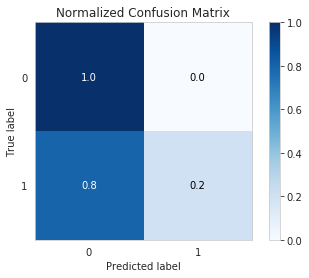

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, pr, normalize=True)
plt.show()

To visualize our model and prediction results, we use the confusion matrix. We import the classification report, which assists us in examining the precision of our model and recall values. It displays the true label on the y-axis and predicts value on the x-axis. It is a normalized confusion matrix. When the test data is zero, it predicts that a hundred percent correctly and when it is zero, it identifies eighty percent of the time correctly when the answer is a zero. 'Zero' represents a Google company and "One' as YouTube. When it has to predict a (one) none of the times it predicts it as zero and only twenty percent times the prediction is correct. We comprehend that from the graph. It takes y_test as the metrics that are the test data and X_test as the training set. 



---



## Part D - Discussion

We have finally established a suitable model for our data set of Google Job Skills. When we examined the accuracy of the SVM model, it demonstrates that it accurately predicts the result most of the times. Its accuracy result is 0.984, which is a remarkably great fit for a model. Hundred percent of the times when it has to predict if the person given the input works in Google or not, it shows us the correct result. Except for when it has to predict if the person will be working for YouTube is eighty percent times it predicts that it is Google. And only twenty percent times it displays it correctly. So it has the power to predict well in the future that given any data set with input (Title, Category, Location, Responsibilities, Minimum Qualifications, and Preferred Qualifications) it can find whether the person can work in Google or YouTube. And that has a surprisingly high accuracy score as well.

### Predicting Fictional Data Frame:

In [ ]:
from pandas import DataFrame

f = {'Company': ['0', '1','1','0','0', '1','1','0'] ,
     'Title': ['233','600','234','231','232','601','231','232'],
     'Category': ['12','7','10','11','14','6','17','13'], 
     'Location': ['70','71','72','69','75','76','77','66'],
     'Responsibilities': ['688','400','689','680','681','401','681'
                          ,'681'], 
     'Minimum Qualifications': ['290','640','641','640','291','642','645'
                                ,'644'], 
     'Preferred Qualifications': ['300','108','109','107','301','104'
                                  ,'103'
                                  ,'105'],}

fiction = pd.DataFrame(f)

In [ ]:
fiction

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,0,233,12,70,688,290,300
1,1,600,7,71,400,640,108
2,1,234,10,72,689,641,109
3,0,231,11,69,680,640,107
4,0,232,14,75,681,291,301
5,1,601,6,76,401,642,104
6,1,231,17,77,681,645,103
7,0,232,13,66,681,644,105


In [ ]:
from sklearn.svm import SVC

In [ ]:
XX = fiction.drop(columns = ["Company"])

In [ ]:
YY = fiction["Company"].values

In [ ]:
clff = SVC(gamma='auto')

In [ ]:
from sklearn.model_selection import train_test_split

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, YY, 
                                                        test_size=0.3, random_state=1, stratify=YY)

In [ ]:
clff.fit(XX_train, yy_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
XX_test

,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
6,231,17,77,681,645,103
7,232,13,66,681,644,105
2,234,10,72,689,641,109


In [ ]:
prr = clff.predict(XX_test)

In [ ]:
clff.score(XX_test,yy_test)

0.3333333333333333

The model that we choose for our fictional instance does not give the desired outcome as it gave in the original data set. The prediction score is poor. It is way below 0.5 which is not a good score at all. It reveals that the model is failing for our presented fictional data set. If a few modifications are performed to the data, it can improve its prediction and accuracy score. As the data set given here is not able to train the model and give us the desired test results.



The accuracy of the original data set seems to fail when there is a large dataset as it takes a lot of time to train it. As it overlaps the classes so cannot make satisfying classification by the hyperplane. And SVM is also sensitive to the type of kernel used as it may not be able to convert low dimensional data into a high one.



---



## Part E - Summary

From the analysis of the model in assignment 3, our goal was to develop a model. I selected the data set of my choice. I successfully implemented the model that is SVM (Support Vector Machine) and performed some transformation on my data set for proper training and testing it. I have to predict that given the inputs if my model can predict whether a person can get a job at Google or YouTube. The inputs being Title, Category, Location, Responsibilities, Minimum Qualifications, and Preferred Qualifications. 0 indicates Google and 1 YouTube. We formatted the string values to numeric data to better fit the model and work properly on it. We also plotted a confusion matrix plot to visualize and present it in a fabulous way for the audience. Users can quickly identify the trend with the plot. The accuracy score of the predict function is quite precise  (0.984).

Using some other analysis to model our data set like Naive Bayes or KNeighbours Classifier could have considered. Through the study, Naive Bayes would have not a good option as SVM classifier provides high accuracy score and faster prediction as compared to the Naive Bayes algorithm. SVM uses the training points to make a decision it uses less memory. 


We can create new knowledge from our analysis. When the model is given data set according to the categories of our data it can predict the results. In this scenario, it predicts that given the input if the person will get a job in which company. Here, The options are Google and YouTube. We can do even more analysis by formatting and modeling data accordingly.



---



## References

1. Dataquest. (2019). Scikit-learn Tutorial: Machine Learning in Python – Dataquest. [online] Available at: https://www.dataquest.io/blog/sci-kit-learn-tutorial/ [Accessed 15 Aug. 2019].

2. DataCamp Community. (2019). Support Vector Machines in Scikit-learn. [online] Available at: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python [Accessed 20 Aug. 2019].

3. Scikit-learn.org. (2019). sklearn.svm.SVC — scikit-learn 0.21.3 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html [Accessed 20 Aug. 2019].